### Group Name: BRAVO 

| Name | Email (registered with Data Glacier) | Country | College/Company | Specialization |
|----------|----------|----------|----------|----------|
| Jackson Taylor | jacksonian.r.taylor@gmail.com | United States | Santa Clara University | Data Science |
| Balamurugan Purushothaman | balamurugan2001viruda@gmail.com | United Kingdom | University of Liverpool | Data Science |
| Nazrin Thanikattil Rafeeque | 101nazrin@gmail.com | United Kingdom | University of Hertfordshire | Data Science |
| Gunjan Varyani | gunjanvaryani916@gmail.com | United States | University of the Cumberlands | Data Science |

## Problem description:

ABC Bank wants to sell its term deposit product to customers and before launching the product they want to develop a model which helps them in understanding whether a particular customer will buy their product or not (based on customer's past interaction with bank or other Financial Institution).

The steps to solving this task include outlining the project, the initial data understanding and strategies to solve data problems, data cleansing and transformation, exploratory data analysis code, exploratory data analysis presentation and model recommendation, model selection and building, and presenting the final solution and code.

In [1174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.ensemble import IsolationForest
from scipy import stats
from scipy.stats import skew
import math
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve, make_scorer, f1_score, accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
import warnings
from sklearn.exceptions import FitFailedWarning

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)



df = pd.read_csv("bank-additional-full.csv", delimiter=";")


columns_in_order = df.columns

numeric_columns = [] 
categorical_columns = []


for col in df.columns:
    if(df[col].dtype==object):
        df[col] = df[col].astype('category')
        categorical_columns.append(col)
    else:   
        numeric_columns.append(col)



print("numerical columns:", numeric_columns)
print("categorical columns:", categorical_columns)

df

numerical columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [1175]:
df.shape

(41188, 21)

In [1176]:
df.duplicated().sum()

np.int64(12)

In [1177]:
df.drop_duplicates(keep = 'first', inplace = True, ignore_index= True)
print(df.duplicated().sum())
print(df.shape)

0
(41176, 21)


In [1178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41176 non-null  int64   
 1   job             41176 non-null  category
 2   marital         41176 non-null  category
 3   education       41176 non-null  category
 4   default         41176 non-null  category
 5   housing         41176 non-null  category
 6   loan            41176 non-null  category
 7   contact         41176 non-null  category
 8   month           41176 non-null  category
 9   day_of_week     41176 non-null  category
 10  duration        41176 non-null  int64   
 11  campaign        41176 non-null  int64   
 12  pdays           41176 non-null  int64   
 13  previous        41176 non-null  int64   
 14  poutcome        41176 non-null  category
 15  emp.var.rate    41176 non-null  float64 
 16  cons.price.idx  41176 non-null  float64 
 17  cons.conf.id

In [1179]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [1180]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Above output shows there are no missing data in the dataset

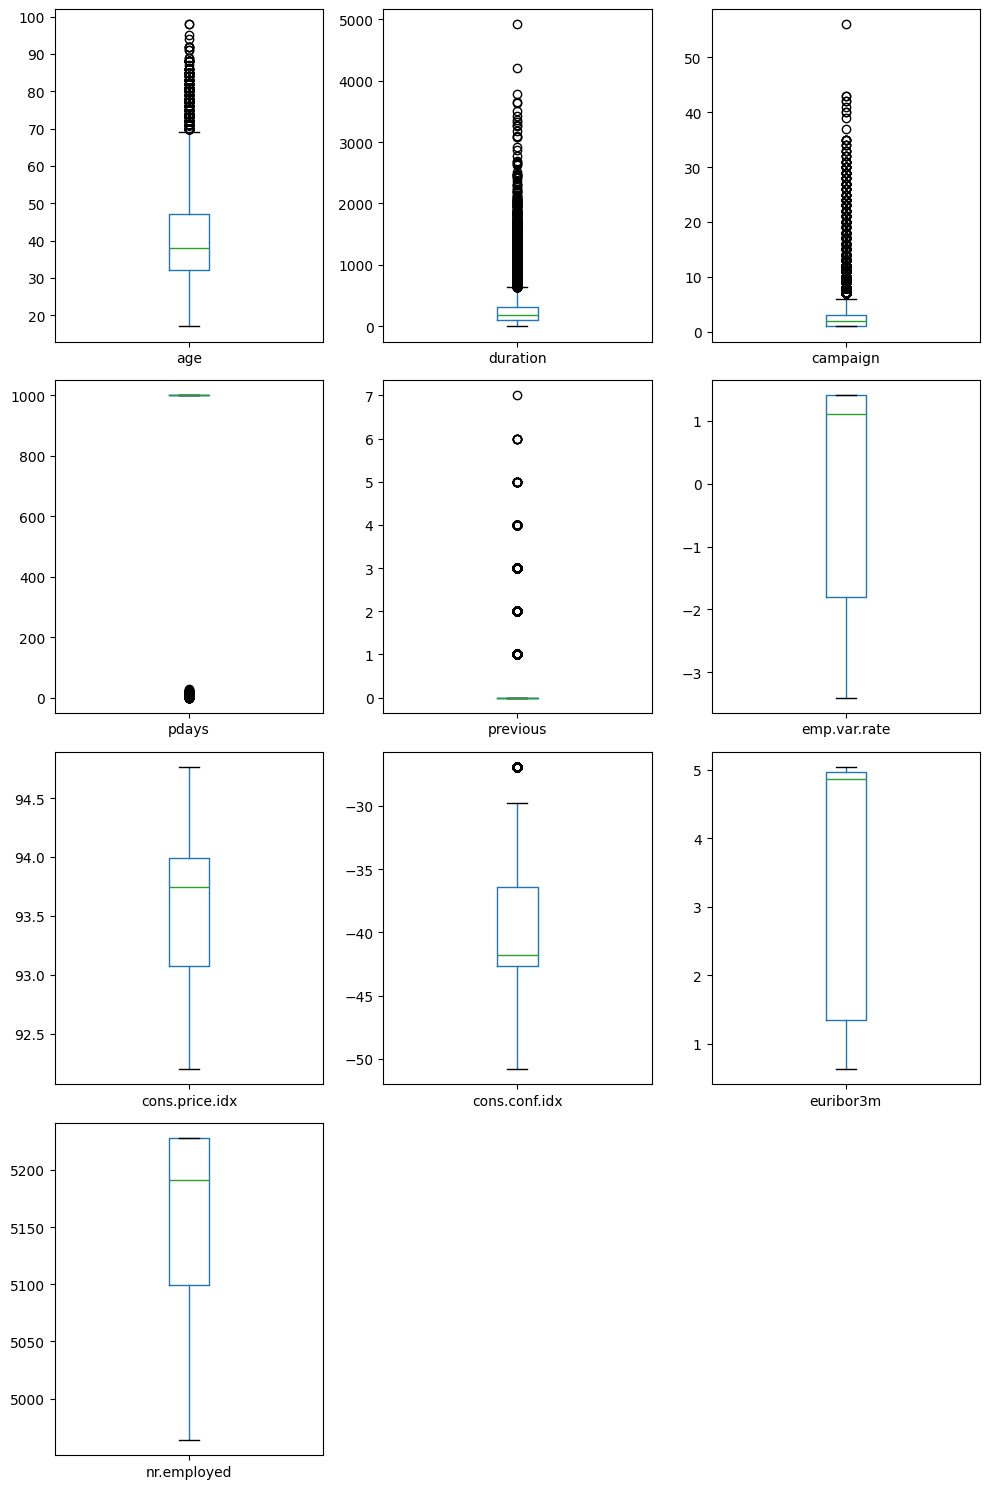

In [1181]:
#outlier detection

plt.figure(figsize=(10,15))

for i, col in enumerate(numeric_columns):
    plt.subplot(4,3,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()

In [1182]:
df[['age', 'pdays', 'campaign', 'previous']].describe()

,age,pdays,campaign,previous
count,41176.00000,41176.000000,41176.000000,41176.000000
mean,40.02380,962.464810,2.567879,0.173013
std,10.42068,186.937102,2.770318,0.494964
min,17.00000,0.000000,1.000000,0.000000
25%,32.00000,999.000000,1.000000,0.000000
50%,38.00000,999.000000,2.000000,0.000000
75%,47.00000,999.000000,3.000000,0.000000
max,98.00000,999.000000,56.000000,7.000000


In [1183]:
len(df[df['pdays'] == 999]) / len(df) * 100

96.32067223625413

In [1184]:
len(df[df['campaign'] > 20])  / len(df) * 100

0.38129007188653585

In [1185]:
len(df[df['campaign'] > 7])

1777

#### Imputation using median:

From df.describe(), the median is the 50% value, which is 2

In [1186]:
#The value which is outside the whisker
print(df['campaign'].quantile(0.95))

7.0


In [1187]:
#replacing the values which are greater than the 95th percentile
df['campaign1'] = np.where(df['campaign'] > 7, 2, df['campaign'])
df[['campaign', 'campaign1']].describe()

,campaign,campaign1
count,41176.000000,41176.000000
mean,2.567879,2.118127
std,2.770318,1.383215
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,56.000000,7.000000


After median imputation, the maximum value has now become 7

#### Imputation using mean:

From df.describe(), the mean is 2.56

In [1188]:
#replacing the values which are greater than the 95th percentile
df['campaign2'] = np.where(df['campaign'] > 7, 2.56, df['campaign'])
df[['campaign', 'campaign1','campaign2']].describe()

,campaign,campaign1,campaign2
count,41176.000000,41176.000000,41176.000000
mean,2.567879,2.118127,2.142295
std,2.770318,1.383215,1.385829
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,3.000000,3.000000,3.000000
max,56.000000,7.000000,7.000000


Statistics of the dataset after both median and mean imputation remains more or less the same

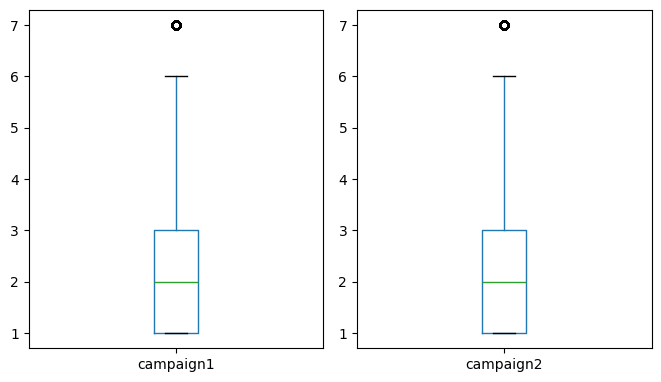

In [1189]:
#outlier detection  after imputation
cols = ['campaign1','campaign2']
plt.figure(figsize=(10,15))
for i, col in enumerate(cols):
    plt.subplot(4,3,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()

In [1190]:

isolation = IsolationForest(contamination='auto',random_state=42)

isolation.fit(df[numeric_columns])

df['anamoly_scores'] = isolation.decision_function(df[numeric_columns])

df['anamoly'] = isolation.predict(df[numeric_columns])


df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,campaign1,campaign2,anamoly_scores,anamoly
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0,0.075461,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0,0.071189,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0,0.107095,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0,0.107145,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0,0.071351,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,yes,1,1.0,-0.141114,-1
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,no,1,1.0,-0.114172,-1
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,no,2,2.0,-0.113699,-1
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,yes,1,1.0,-0.110737,-1


In [1191]:
df.loc[: , ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','anamoly_scores','anamoly'] ]


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,anamoly_scores,anamoly
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.075461,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.071189,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.107095,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.107145,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0.071351,1
...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,-0.141114,-1
41172,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,-0.114172,-1
41173,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,-0.113699,-1
41174,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,-0.110737,-1


In [1192]:

def outlier_plot(data, outlier_method_name):
    print(f'Outlier Method: {outlier_method_name}')
    print(f"Number of anomalous values {len(data[data['anamoly'] == -1])}")
    print(f"Number of non anomalous values {len(data[data['anamoly'] == 1])}")
    print(f'Total Number of Values: {len(data)}')


outlier_plot(df,'Isolation Forest')

Outlier Method: Isolation Forest
Number of anomalous values 7739
Number of non anomalous values 33437
Total Number of Values: 41176


In [1193]:
df_wo_trans = df

In [1194]:
df_wo_trans

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,campaign1,campaign2,anamoly_scores,anamoly
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0,0.075461,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0,0.071189,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0,0.107095,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0,0.107145,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0,0.071351,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,yes,1,1.0,-0.141114,-1
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,no,1,1.0,-0.114172,-1
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,no,2,2.0,-0.113699,-1
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,yes,1,1.0,-0.110737,-1


### Isolation Forest: 
The algorithm makes use of decision trees by averaging their predictions to assign a final anomaly score. This determines how much of an anomaly it is or how much of an anomaly it isn't.
In this case, an anomaly is an outlier.

In [1195]:
#Defining the first and third quartile to find the IQR for the numeric columns.
#Defining the Lower bound and Upper bound using the formula.
#Returns the outliers within each column.
def identify_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < LB) | (df[column_name] > UB)]
    return outliers

# creating a dict to store the outliers
outliers_counts_iqr = {}


In [1196]:
for column in numeric_columns:
    outliers_iqr = identify_outliers_iqr(df, column)
    outliers_counts_iqr[column] = len(outliers_iqr)
'''  
    # Plotting the outliers
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(df.index, df[column], color='blue', alpha=0.6, edgecolors='w', s=50, label='Data Points')
    plt.scatter(outliers_iqr.index, outliers_iqr[column], color='red', alpha=0.6, edgecolors='w', s=50, label='Outliers')
    plt.title(f'Outliers in {column} (IQR Method)')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
'''


# Print the total number of outliers in each column
print("\nTotal number of outliers in each column using IQR method:")
for column, count in outliers_counts_iqr.items():
    print(f"{column}: {count}")



Total number of outliers in each column using IQR method:
age: 468
duration: 2963
campaign: 2406
pdays: 1515
previous: 5625
emp.var.rate: 0
cons.price.idx: 0
cons.conf.idx: 446
euribor3m: 0
nr.employed: 0



The IQR identify outliers by computing Interquartile range and data points that fall above and below 1.5 times the IQR from first and quartiles . Graphs are plotted with outliers highlighted in red for every numeric columns.For instance in "duration" column a large number of outliers are identified indicating significant spread of data.The scatter plot highlight how the IQR method captures extreme values effectively.

### Method 2 (Using Z-score)

The Z-score is calculayted from Z= σ/x−μ,σ :is the standard deviation and μ is the mean of the data points

In [1197]:
threshold = 3
outliers_counts_Zscore = {}

In [1198]:
for column in numeric_columns:
    #Computing the Z_score for columns
    #Identifying the column indices where z score is above threshold and counting outliers
    column_z_scores = np.abs(stats.zscore(df[column]))
    outlier_indices = np.where(column_z_scores > threshold)[0]
    outliers_counts_Zscore[column] = len(outlier_indices)
'''  
    # Plotting the outliers
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(df[column].index, column_z_scores, c=(column_z_scores > threshold), cmap='coolwarm', alpha=0.6, edgecolors='w', s=50)
    plt.title(f'Z-Scores for {column}')
    plt.xlabel('Index')
    plt.ylabel('Z-Score')
    plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
    plt.axhline(y=-threshold, color='r', linestyle='--')
    plt.legend()
'''


# Print the total number of outliers in each column
print("\nTotal number of outliers in each column:")
for column, count in outliers_counts_Zscore.items():
    print(f"{column}: {count}")



Total number of outliers in each column:
age: 369
duration: 861
campaign: 869
pdays: 1515
previous: 1064
emp.var.rate: 0
cons.price.idx: 0
cons.conf.idx: 0
euribor3m: 0
nr.employed: 0



Z -score value tells how far and the direction in which the data point from mean . Here outliers are identified by defining a threshold of 3.As it give the best result on visualisation than lower thresholds.In the scatter plots , Z-scores for each numeric column with data points above the threshold highlighted as outliers.For instance, the 'duration' column shows fewer outliers compared to the IQR method, suggesting the Z-score method is more conservative.​

### Comparison of IQR and Z-score:

In terms of sensitvity, IQR is more robust to non - normal distribution and skewed data whereas, z-score assumes a normal distribution .This has effected its performance on skewed data columns.

IQR method has identified more outiliers in columns like "duration","campaign","previous" demonstrating its thoroughness in spotting anomalies. Z-score method found fewer outliers, which is appropriate for normally distributed data but not for data with a wide range of values.

The IQR approach is easy to interpret and explain because it is based on quartiles and data distribution.The Z-score method, which needs an awareness of standard deviations, may be less straightforward.

Based on the analysis IQR is more recommended over Z-score for outlier detection

In [1199]:
columns_to_encode = [item for item in categorical_columns  if item not in ["contact","y"]]


new_categorical_vars = pd.get_dummies(df[columns_to_encode])
df[new_categorical_vars.keys()] = new_categorical_vars



In [1200]:
target_columns = ["age", "duration", "emp.var.rate", "cons.price.idx", "cons.conf.idx","euribor3m"]


skewness = skew(df[target_columns])
print("Skew before log and cube root transformation:")
print(skewness)

i =0
for item in skewness:
    if abs(item)<1:
        print("passes", target_columns[i])
    else:
        print("fails", target_columns[i])
    i+=1

print()

positive_skewed_columns = []
mixed_skewed_columns = []



for col, skew_t in zip(target_columns, skewness):
    if(abs(skew_t)>1):
        if ((df[col] >= 0).all()):
            positive_skewed_columns.append(col)
        else:
            mixed_skewed_columns.append(col)



df[positive_skewed_columns] = df[positive_skewed_columns].map(lambda x: np.log(x+1))
df[mixed_skewed_columns] = df[mixed_skewed_columns].map(lambda x: math.pow(x, 1/3))



skewness = skew(df[target_columns])


print("Skew after log and cube root transformation:")
print(skewness)

i =0
for item in skewness:
    if abs(item)<1:
        print("passes", target_columns[i])
    else:
        print("fails", target_columns[i])
    i+=1




Skew before log and cube root transformation:
[ 0.78453168  3.26268865 -0.72403421 -0.2308445   0.30286497 -0.70916838]
passes age
fails duration
passes emp.var.rate
passes cons.price.idx
passes cons.conf.idx
passes euribor3m

Skew after log and cube root transformation:
[ 0.78453168 -0.42148342 -0.72403421 -0.2308445   0.30286497 -0.70916838]
passes age
passes duration
passes emp.var.rate
passes cons.price.idx
passes cons.conf.idx
passes euribor3m


In [1201]:



filtered_pday = df["pdays"][df["pdays"]!=999]
bins = np.linspace(min(filtered_pday), max(filtered_pday), 10) 
binned = list(np.digitize(filtered_pday, bins))
old_nof_values = len(set(binned))


i =0
for item in list(df["pdays"]):
    if item == 999:
        binned.insert(i, np.int64(old_nof_values+1))
    i+=1

# LOOK: need to save somewhere
# print(min(filtered_pday))
# print(max(filtered_pday))
# print(binned)
# i =0
# j = 0
# for item in binned:
#     if item != np.int64(11):
#         print(i)
#         j+=1
#     i+=1
# print("non 999 counts:", j)

new_categorical_vars = pd.get_dummies(pd.Categorical(binned), prefix='pdays')
pday_keys = new_categorical_vars.keys()
df[pday_keys] = new_categorical_vars



df['nr.employed_cat'] = pd.cut(df['nr.employed'], bins=3, labels=False, right=False)
df['campaign_cat'] = pd.cut(df['campaign'], bins=3, labels=False, right=False)




<class 'pandas.core.series.Series'>
0        2
1        2
2        2
3        2
4        2
        ..
41171    0
41172    0
41173    0
41174    0
41175    0
Name: nr.employed_cat, Length: 41176, dtype: int64


One hot encoded and ordered categorical variables are made for the skewed and abnormal features: pdays, nr.employed, and campaign

In [1202]:

def grid_search_pipeline(df, pipeline, param_grid, scorer):

    X = df.drop(columns=['y'])
    y = df['y']


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)


    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, n_jobs=-1, scoring=scorer)

    grid_search.fit(X_train, y_train)

    # Best parameters and estimator
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_


    print(f'Best parameters: {best_params}')


    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]


    accuracy_best = accuracy_score(y_test, y_pred)
    precision_best = precision_score(y_test, y_pred)
    recall_best = recall_score(y_test, y_pred)
    f1_best = f1_score(y_test, y_pred)

    

    print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')
    print(f'F1 Score: {f1_best}') 
    print(f'Accuracy: {accuracy_best}')
    print(f'Precision: {precision_best}')
    print(f'Recall: {recall_best}')
    print()

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_roc = auc(fpr, tpr)

    print(f'auc_roc: {auc_roc}')
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_roc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    auc_pr = auc(recall, precision)
    
    print(f'auc_pr: {auc_pr}')
    plt.figure()
    plt.plot(recall, precision, label=f'PR curve (AUC = {auc_pr:.2f})')
    plt.plot([0, 1], [.5, .5], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower right')
    plt.show()


    return best_params



In [1203]:
def test_model(df, pipeline):
    X = df.drop(columns=['y'])
    y = df['y']


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)



    mdl = pipeline.fit(X_train, y_train)



    y_pred = mdl.predict(X_test)
    y_prob = mdl.predict_proba(X_test)[:, 1]


    accuracy_best = accuracy_score(y_test, y_pred)
    precision_best = precision_score(y_test, y_pred)
    recall_best = recall_score(y_test, y_pred)
    f1_best = f1_score(y_test, y_pred)

    

    print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')
    print(f'F1 Score: {f1_best}') 
    print(f'Accuracy: {accuracy_best}')
    print(f'Precision: {precision_best}')
    print(f'Recall: {recall_best}')
    print()

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_roc = auc(fpr, tpr)

    print(f'auc_roc: {auc_roc}')
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_roc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    auc_pr = auc(recall, precision)
    
    print(f'auc_pr: {auc_pr}')
    plt.figure()
    plt.plot(recall, precision, label=f'PR curve (AUC = {auc_pr:.2f})')
    plt.plot([0, 1], [.5, .5], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower right')
    plt.show()


In [1204]:
# Outlier replacement methods:
# They are less effective than simply using anomaly classes and scores

def handle_outliers_IQR_median(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    return col.where((col >= LB) & (col <= UB), col.median())


def handle_outliers_Z_median(col):
    col.where((np.abs(stats.zscore(col)) <= threshold), col.median())


def handle_outliers_IQR_mean(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    return col.where((col >= LB) & (col <= UB), col.mean())

def handle_outliers_Z_mean(col):
    col.where((np.abs(stats.zscore(col)) <= threshold), col.mean())

In [1205]:



column_selections = [col for col in df.columns if col not in [item for item in categorical_columns if item not in ["contact","y"]]+['y',"duration","campaign1","campaign2"]]


numeric_indices = [i for (i,col) in zip(range(len(column_selections)), column_selections) if col in numeric_columns]


scalar = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_indices)
    ],
    remainder='passthrough'
)

# LOOK: need to save somewhere
# new_df_no_y =  new_df.drop('y', axis = 1)
# indices = [i for (i,col) in zip(range(len(new_df_no_y.columns)), new_df_no_y.columns) if col in numeric_columns]

# scalar = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), indices)
#     ],
#     remainder='passthrough'
# )

## This portion is dedicated to building models without duration feature

Gradient Boosting Classifier with RandomOverSampler:


Best parameters: {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 5, 'gradientboostingclassifier__n_estimators': 200}
Confusion Matrix:
 [[6219 1046]
 [ 132  839]]
F1 Score: 0.5875350140056023
Accuracy: 0.8569694026226323
Precision: 0.4450928381962865
Recall: 0.8640576725025747

auc_roc: 0.9244996147747868


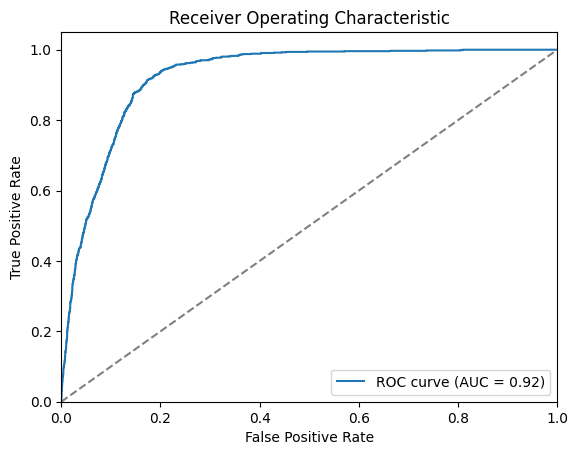

auc_pr: 0.5759580028322784


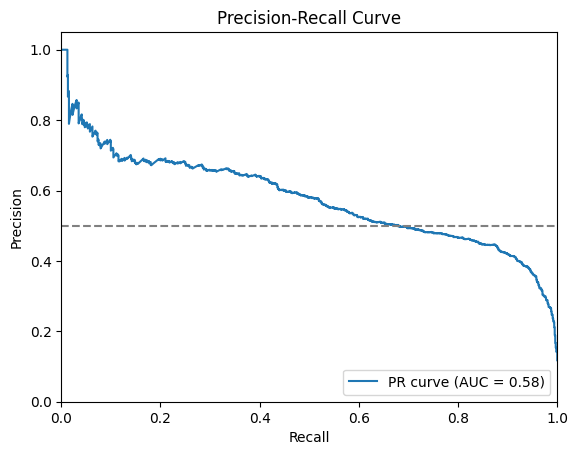

Gradient Boosting Classifier with SMOTE:
Confusion Matrix:
 [[6950  315]
 [ 532  439]]
F1 Score: 0.5089855072463768
Accuracy: 0.8971588149587179
Precision: 0.5822281167108754
Recall: 0.45211122554067973

auc_roc: 0.9215911821346225


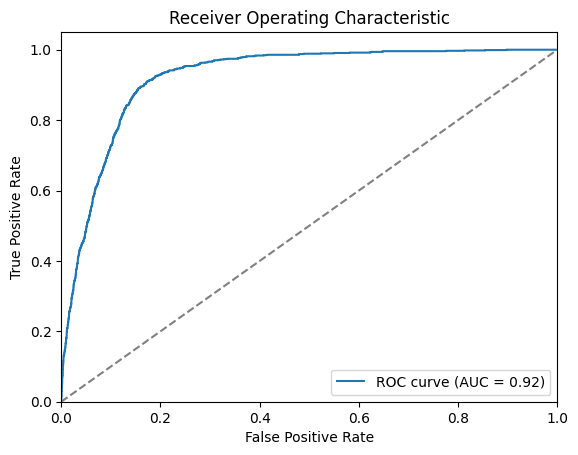

auc_pr: 0.5794173117167362


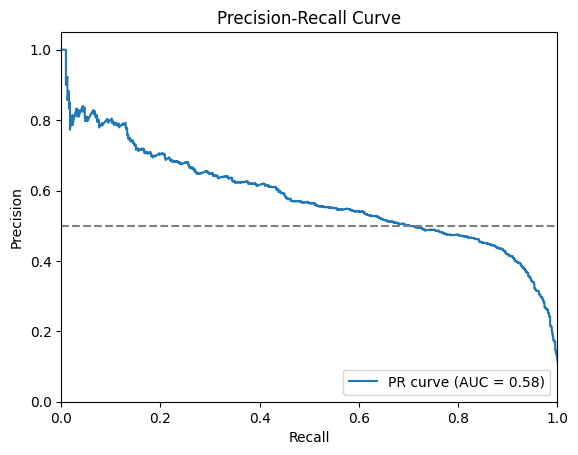

In [1206]:
new_df = df.copy()
new_df["y"] = new_df["y"] == "yes"
new_df["contact"] = new_df["contact"] == "cellular"
new_df = new_df.drop([item for item in categorical_columns  if item not in ["contact","y"]], axis =1)
new_df = new_df.drop(["duration","campaign1","campaign2"], axis = 1)



pipeline=make_pipeline(RandomOverSampler(random_state=42), scalar, GradientBoostingClassifier(random_state=42))

param_grid = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [0.01, 0.1],
    'gradientboostingclassifier__max_depth': [5, 10]
}

scorer = make_scorer(f1_score)

print("Gradient Boosting Classifier with RandomOverSampler:")
params = grid_search_pipeline(new_df, pipeline, param_grid, scorer)


mdl = GradientBoostingClassifier(random_state=42, n_estimators = params["gradientboostingclassifier__n_estimators"], learning_rate= params["gradientboostingclassifier__learning_rate"], max_depth= params["gradientboostingclassifier__max_depth"])


print("Gradient Boosting Classifier with SMOTE:")
pipeline=make_pipeline(SMOTE(random_state=42), scalar, mdl)
test_model(new_df, pipeline)

Logistic Regression Classifier:
Best parameters: {'logisticregression__C': 0.5, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}
Confusion Matrix:
 [[6152 1113]
 [ 171  800]]
F1 Score: 0.5547850208044383
Accuracy: 0.8440990772219524
Precision: 0.4181913225300575
Recall: 0.82389289392379

auc_roc: 0.9027559727627702


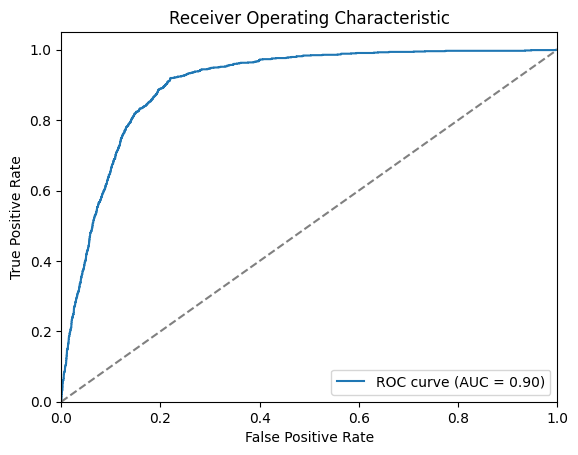

auc_pr: 0.503122020076905


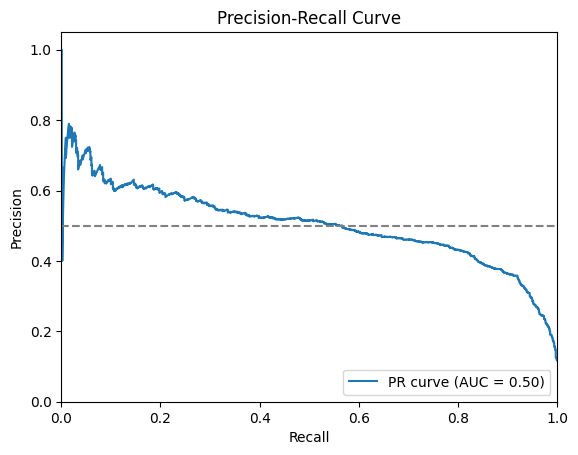

Logistic Regression Classifier with SMOTE:
Confusion Matrix:
 [[6151 1114]
 [ 185  786]]
F1 Score: 0.5475444096133751
Accuracy: 0.842277804759592
Precision: 0.41368421052631577
Recall: 0.8094747682801235

auc_roc: 0.900715944779897


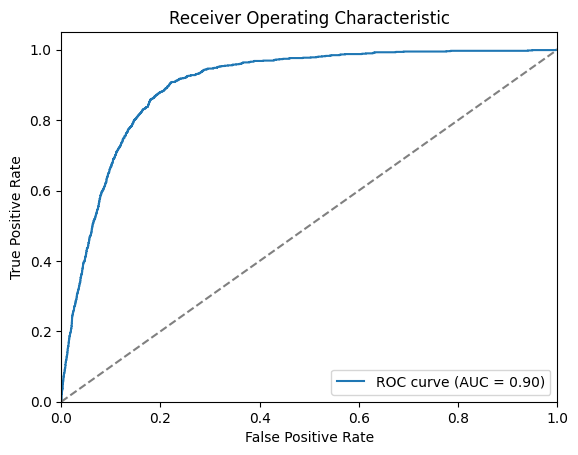

auc_pr: 0.5011490129609917


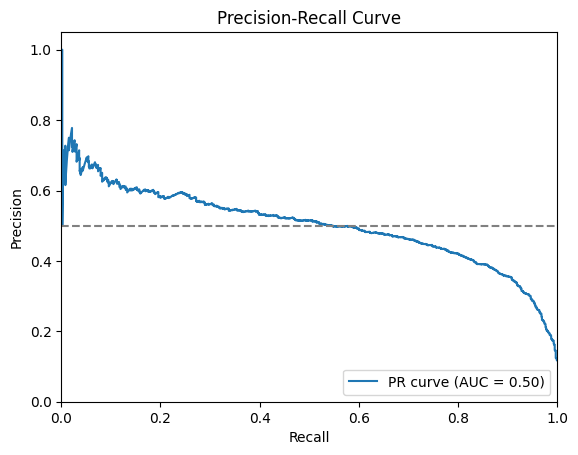

Logistic Regression Classifier with RandomOverSampler:
Confusion Matrix:
 [[6149 1116]
 [ 171  800]]
F1 Score: 0.5542085209560097
Accuracy: 0.8437348227294803
Precision: 0.4175365344467641
Recall: 0.82389289392379

auc_roc: 0.9026780062982727


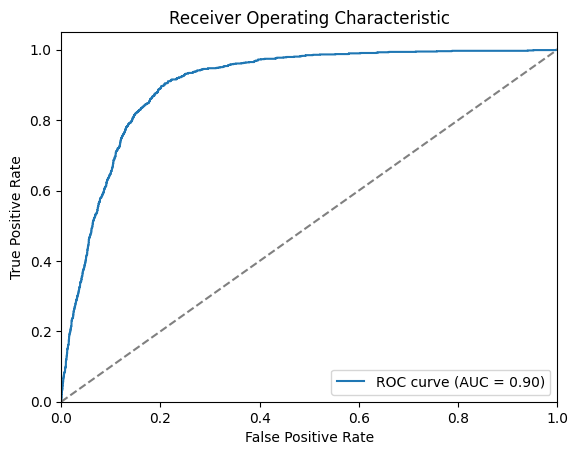

auc_pr: 0.5014618220922112


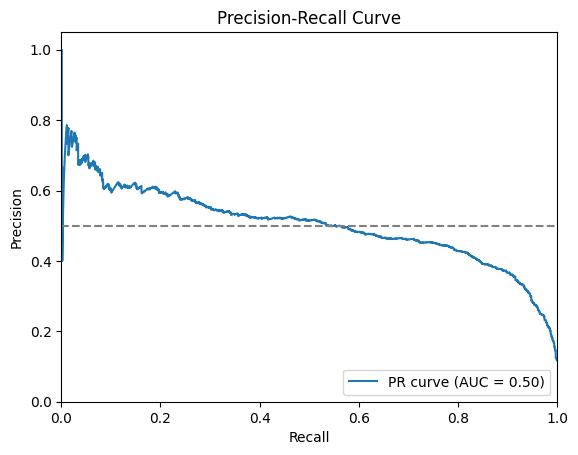

In [1207]:
new_df = df.copy()
new_df["y"] = new_df["y"] == "yes"
new_df["contact"] = new_df["contact"] == "cellular"
new_df = new_df.drop([item for item in categorical_columns  if item not in ["contact","y"]], axis =1)
new_df = new_df.drop(["duration","campaign1","campaign2"], axis = 1)




pipeline=make_pipeline(scalar, LogisticRegression(class_weight = 'balanced' , random_state = 42, max_iter = 3000))


param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500],
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet'],
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
}


scorer = make_scorer(f1_score)

print("Logistic Regression Classifier:")
params = grid_search_pipeline(new_df, pipeline, param_grid, scorer)

mdl = LogisticRegression(class_weight = 'balanced', random_state = 42, max_iter = 3000, C = params['logisticregression__C'], penalty = params['logisticregression__penalty'], solver = params['logisticregression__solver'])


print("Logistic Regression Classifier with SMOTE:")
pipeline=make_pipeline(SMOTE(random_state=42), scalar, mdl)
test_model(new_df, pipeline)


print("Logistic Regression Classifier with RandomOverSampler:")
pipeline=make_pipeline(RandomOverSampler(random_state=42), scalar, mdl)
test_model(new_df, pipeline)

SVM classifier:
Best parameters: {'svc__C': 100, 'svc__gamma': 0.01}
Confusion Matrix:
 [[2307  355]
 [  74  264]]
F1 Score: 0.5517241379310345
Accuracy: 0.857
Precision: 0.42649434571890144
Recall: 0.7810650887573964

auc_roc: 0.8989703875272852


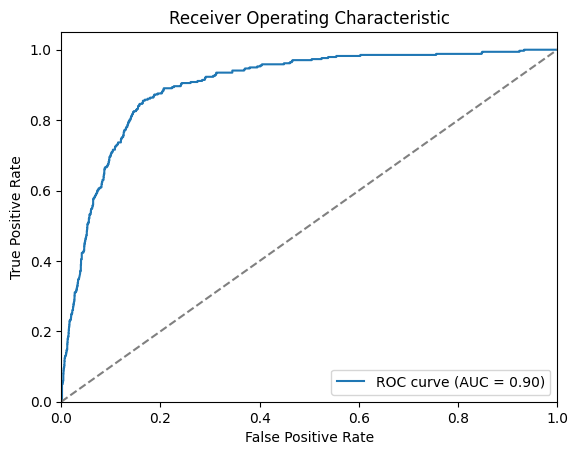

auc_pr: 0.5124502935741223


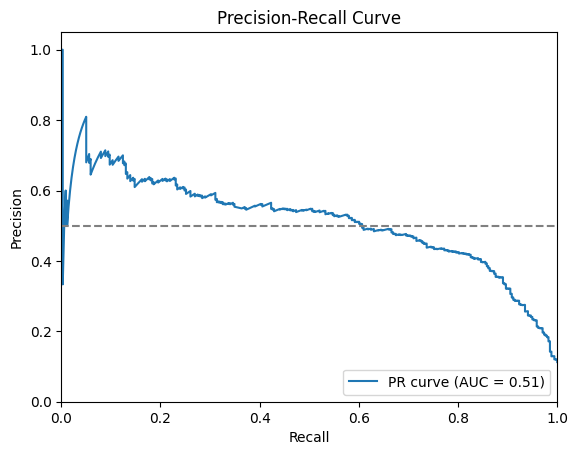

SVM classifier RandomOverSampler:
Confusion Matrix:
 [[2314  348]
 [  84  254]]
F1 Score: 0.5404255319148936
Accuracy: 0.856
Precision: 0.4219269102990033
Recall: 0.7514792899408284

auc_roc: 0.8929209696851145


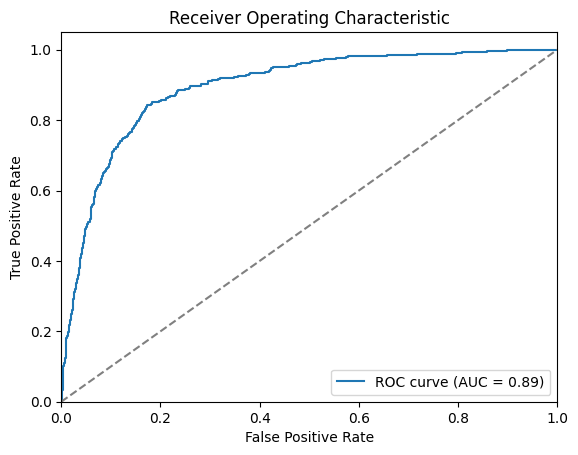

auc_pr: 0.5151259030468806


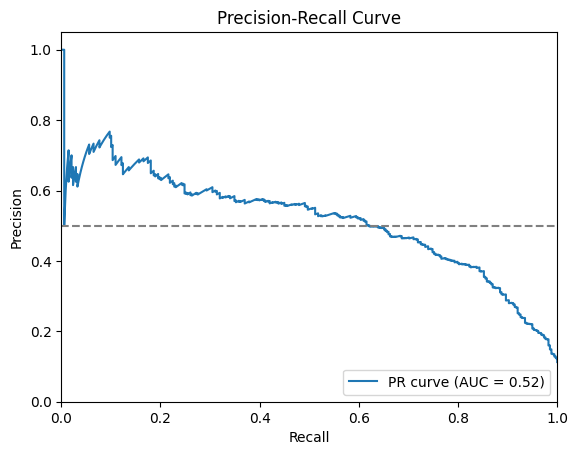

SVM classifier SMOTE:
Confusion Matrix:
 [[2502  160]
 [ 155  183]]
F1 Score: 0.5374449339207048
Accuracy: 0.895
Precision: 0.5335276967930029
Recall: 0.5414201183431953

auc_roc: 0.8908670795193364


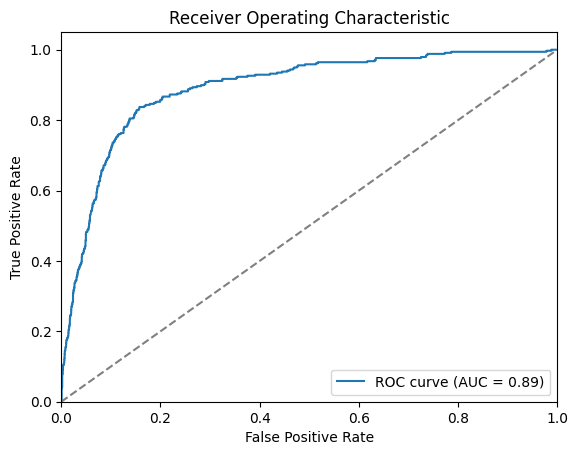

auc_pr: 0.5278834113527029


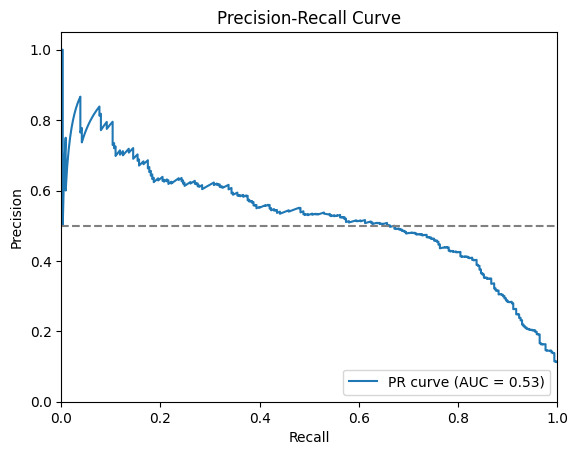

In [1208]:
new_df = df.copy()
new_df = new_df.sample(n=15000, random_state=42)
new_df["y"] = new_df["y"] == "yes"
new_df["contact"] = new_df["contact"] == "cellular"
new_df = new_df.drop([item for item in categorical_columns  if item not in ["contact","y"]], axis =1)
new_df = new_df.drop(["duration","campaign1","campaign2"], axis = 1)



pipeline=make_pipeline(scalar, SVC(probability=True, kernel='rbf', max_iter = -1, class_weight = 'balanced', tol = .001, random_state=42))

param_grid = {
  'svc__C': [1, 10, 100],
  'svc__gamma': [0.001, 0.01],
}


scorer = make_scorer(f1_score)

print("SVM classifier:")
params = grid_search_pipeline(new_df, pipeline, param_grid, scorer)

mdl = SVC(class_weight = 'balanced', probability=True, kernel='rbf', max_iter = -1, tol = .001, random_state=42, C = params["svc__C"], gamma = params['svc__gamma'])


print("SVM classifier RandomOverSampler:")
pipeline=make_pipeline(RandomOverSampler(random_state=42), scalar, mdl)
test_model(new_df, pipeline)

print("SVM classifier SMOTE:")
pipeline=make_pipeline(SMOTE(random_state=42), scalar, mdl)
test_model(new_df, pipeline)

Random Forest Classifier:
Best parameters: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 4, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__n_estimators': 200}
Confusion Matrix:
 [[6438  827]
 [ 232  739]]
F1 Score: 0.5825778478517935
Accuracy: 0.871418164157358
Precision: 0.4719029374201788
Recall: 0.761071060762101

auc_roc: 0.9128252707739872


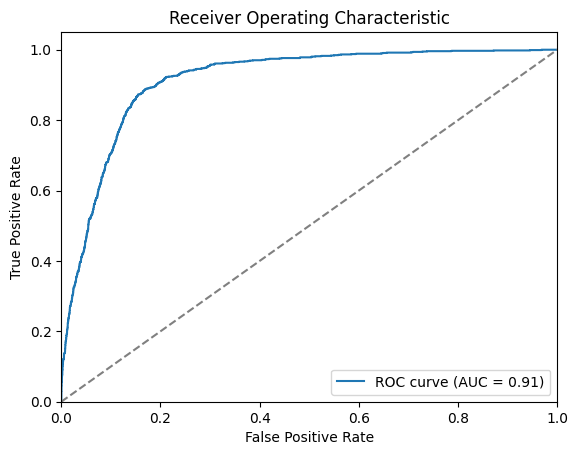

auc_pr: 0.568105501601542


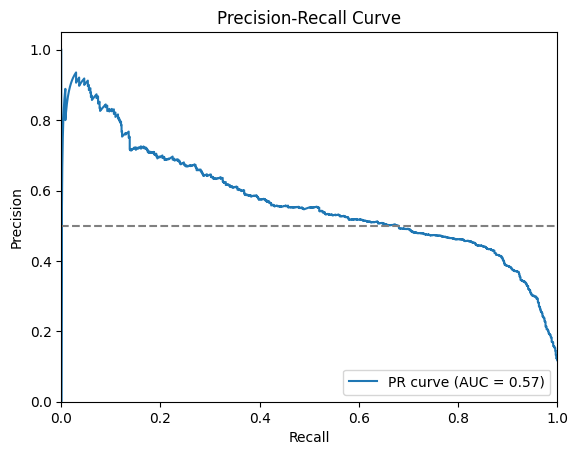

Random Forest Classifier RandomOverSampler:
Confusion Matrix:
 [[6444  821]
 [ 241  730]]
F1 Score: 0.5789056304520223
Accuracy: 0.8710539096648858
Precision: 0.4706640876853643
Recall: 0.7518022657054583

auc_roc: 0.9129188305313839


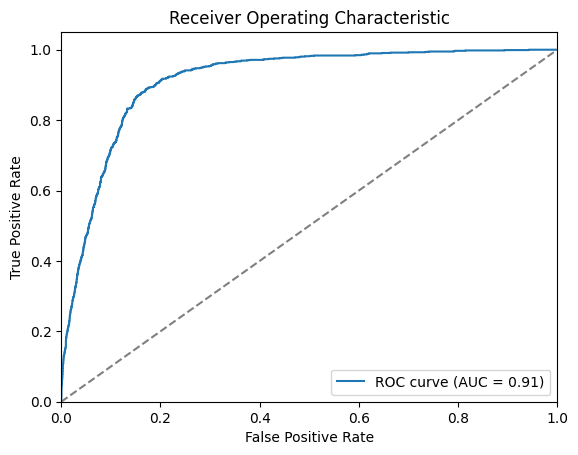

auc_pr: 0.5651430791297447


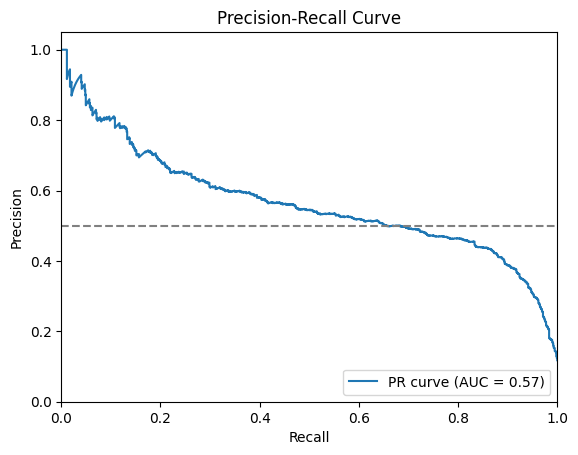

Random Forest Classifier SMOTE:
Confusion Matrix:
 [[6920  345]
 [ 548  423]]
F1 Score: 0.4864864864864865
Accuracy: 0.8915735794074794
Precision: 0.55078125
Recall: 0.4356333676622039

auc_roc: 0.9080375628250227


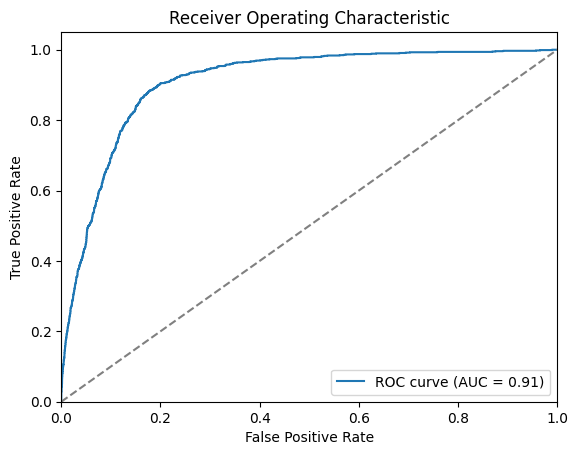

auc_pr: 0.5568626569534474


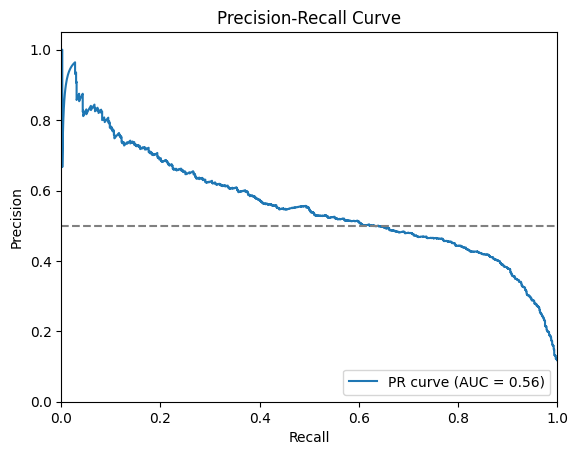

In [1209]:

new_df = df.copy()
new_df["y"] = new_df["y"] == "yes"
new_df["contact"] = new_df["contact"] == "cellular"
new_df = new_df.drop([item for item in categorical_columns  if item not in ["contact","y"]], axis =1)
new_df = new_df.drop(["duration","campaign1","campaign2"], axis = 1)
    


pipeline=make_pipeline(scalar, RandomForestClassifier(n_jobs=1, random_state=42, class_weight = 'balanced'))


param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 20, 40],
    'randomforestclassifier__min_samples_split': [2, 10],
    'randomforestclassifier__min_samples_leaf': [1, 4, 8]
}


scorer = make_scorer(f1_score)
print("Random Forest Classifier:")
params = grid_search_pipeline(new_df, pipeline, param_grid, scorer)


mdl = RandomForestClassifier(n_jobs=1, random_state=42,max_depth = params['randomforestclassifier__max_depth'], 
                             min_samples_leaf = params['randomforestclassifier__min_samples_leaf'],
                             min_samples_split =  params['randomforestclassifier__min_samples_split'],
                             n_estimators= params['randomforestclassifier__n_estimators']
                             )


print("Random Forest Classifier RandomOverSampler:")
pipeline=make_pipeline(RandomOverSampler(random_state=42), scalar, mdl)
test_model(new_df, pipeline)

print("Random Forest Classifier SMOTE:")
pipeline=make_pipeline(SMOTE(random_state=42), scalar, mdl)
test_model(new_df, pipeline)

## This portion is dedicated to building models with duration feature

In [1210]:
column_selections = [col for col in df.columns if col not in [item for item in categorical_columns if item not in ["contact","y"]]+['y',"campaign1","campaign2"]]


numeric_indices = [i for (i,col) in zip(range(len(column_selections)), column_selections) if col in numeric_columns]


scalar = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_indices)
    ],
    remainder='passthrough'
)

Gradient Boosting Classifier with RandomOverSampler:
Best parameters: {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 10, 'gradientboostingclassifier__n_estimators': 100}
Confusion Matrix:
 [[6638  627]
 [ 235  736]]
F1 Score: 0.6306769494430163
Accuracy: 0.8953375424963574
Precision: 0.5399853264856933
Recall: 0.7579814624098867

auc_roc: 0.9393232369124429


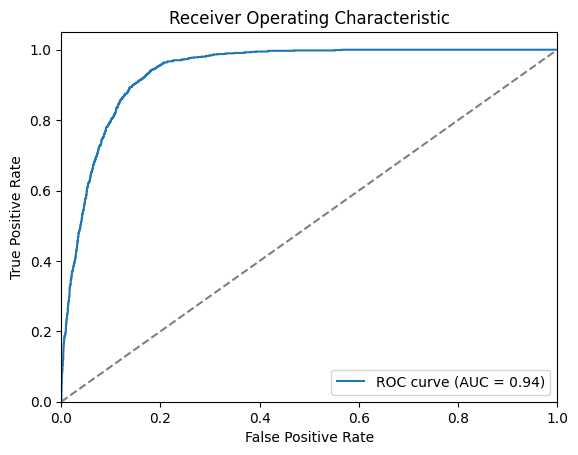

auc_pr: 0.6404796988038487


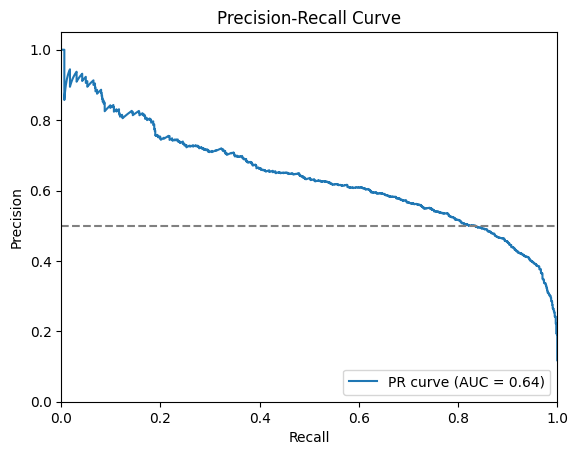

Gradient Boosting Classifier with SMOTE:
Confusion Matrix:
 [[6906  359]
 [ 378  593]]
F1 Score: 0.6167446697867914
Accuracy: 0.9105148130160272
Precision: 0.6228991596638656
Recall: 0.6107106076210093

auc_roc: 0.9442785018814726


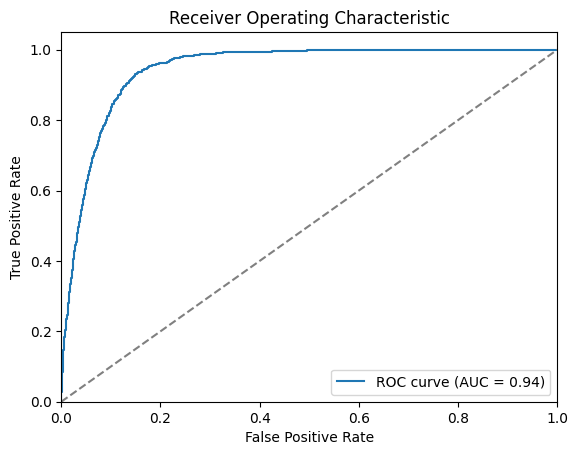

auc_pr: 0.6512907878656846


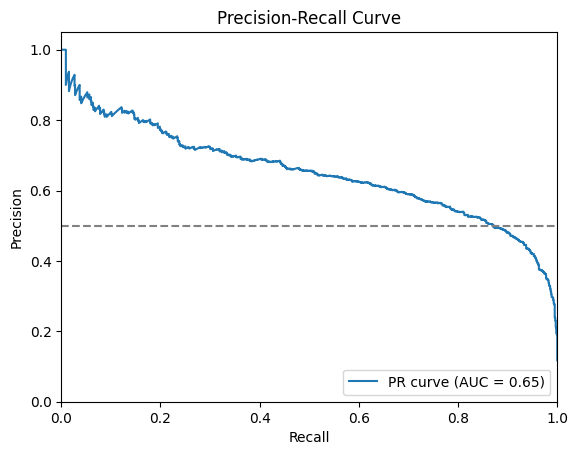

In [1211]:
new_df = df.copy()
new_df["y"] = new_df["y"] == "yes"
new_df["contact"] = new_df["contact"] == "cellular"
new_df = new_df.drop([item for item in categorical_columns  if item not in ["contact","y"]], axis =1)
new_df = new_df.drop(["campaign1","campaign2"], axis = 1)



pipeline=make_pipeline(RandomOverSampler(random_state=42), scalar, GradientBoostingClassifier(random_state=42))

param_grid = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [0.01, 0.1],
    'gradientboostingclassifier__max_depth': [5, 10]
}


scorer = make_scorer(f1_score)

print("Gradient Boosting Classifier with RandomOverSampler:")
params = grid_search_pipeline(new_df, pipeline, param_grid, scorer)


mdl = GradientBoostingClassifier(random_state=42, n_estimators = params["gradientboostingclassifier__n_estimators"], learning_rate= params["gradientboostingclassifier__learning_rate"], max_depth= params["gradientboostingclassifier__max_depth"])


print("Gradient Boosting Classifier with SMOTE:")
pipeline=make_pipeline(SMOTE(random_state=42), scalar, mdl)
test_model(new_df, pipeline)

Logistic Regression Classifier:
Best parameters: {'logisticregression__C': 0.5, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
Confusion Matrix:
 [[6174 1091]
 [ 107  864]]
F1 Score: 0.5905673274094326
Accuracy: 0.8545410393394852
Precision: 0.44194373401534526
Recall: 0.8898043254376931

auc_roc: 0.9344836458252856


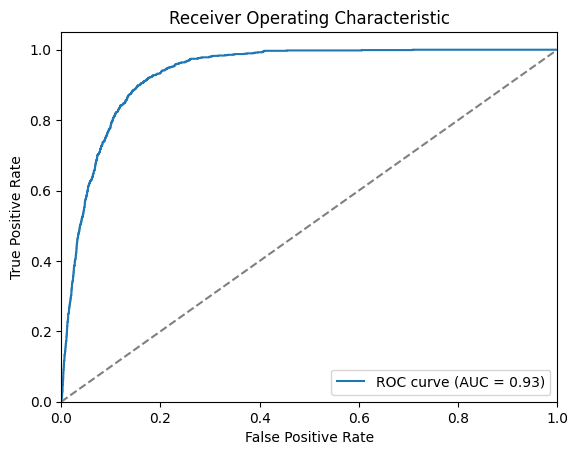

auc_pr: 0.5935596555061052


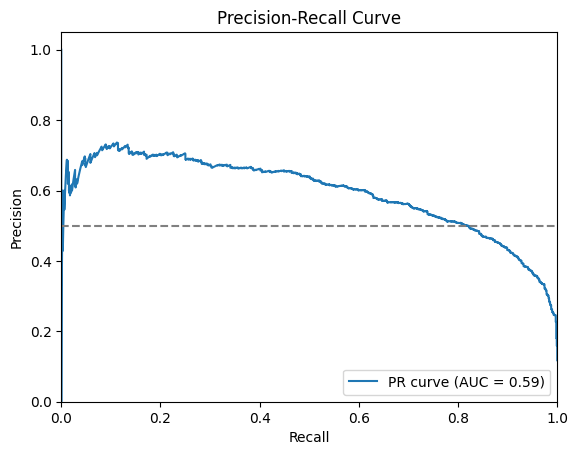

Logistic Regression Classifier with SMOTE:
Confusion Matrix:
 [[6244 1021]
 [ 122  849]]
F1 Score: 0.5976768743400211
Accuracy: 0.8612190383681398
Precision: 0.4540106951871658
Recall: 0.874356333676622

auc_roc: 0.93340487347106


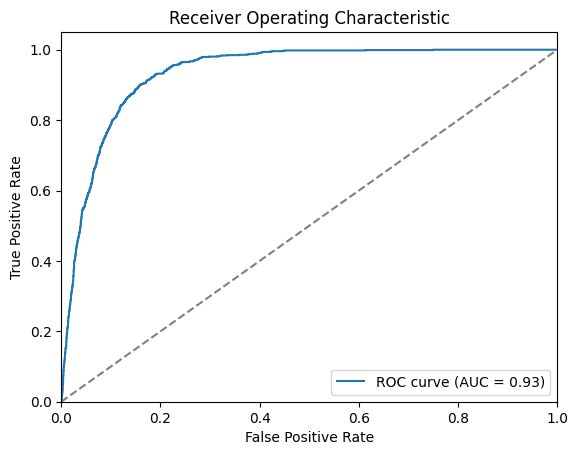

auc_pr: 0.5888114031867852


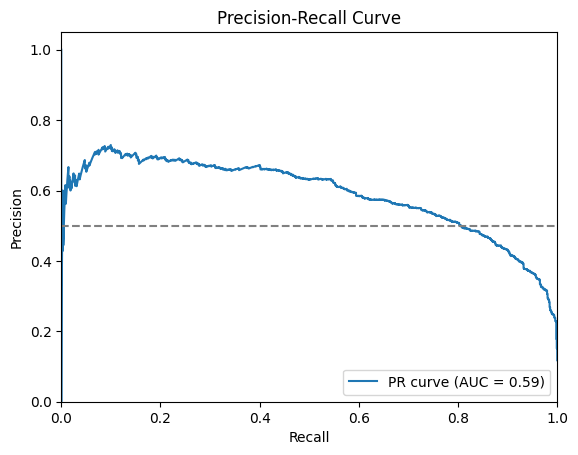

Logistic Regression Classifier with RandomOverSampler:
Confusion Matrix:
 [[6181 1084]
 [ 106  865]]
F1 Score: 0.5924657534246576
Accuracy: 0.855512384652744
Precision: 0.443817342226783
Recall: 0.8908341915550978

auc_roc: 0.93449030841407


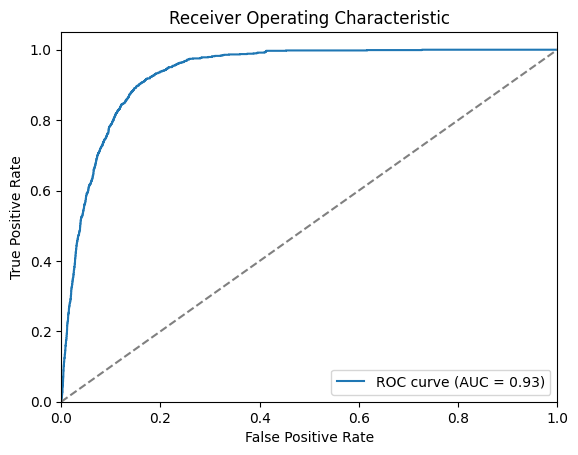

auc_pr: 0.5936140978941211


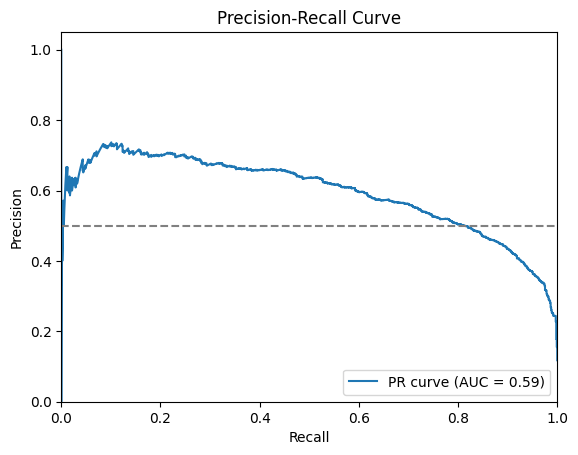

In [1212]:
new_df = df.copy()
new_df["y"] = new_df["y"] == "yes"
new_df["contact"] = new_df["contact"] == "cellular"
new_df = new_df.drop([item for item in categorical_columns  if item not in ["contact","y"]], axis =1)
new_df = new_df.drop(["campaign1","campaign2"], axis = 1)




pipeline=make_pipeline(scalar, LogisticRegression(class_weight = 'balanced', random_state = 42, max_iter = 3000))


param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500],
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet'],
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
}


scorer = make_scorer(f1_score)

print("Logistic Regression Classifier:")
params = grid_search_pipeline(new_df, pipeline, param_grid, scorer)

mdl = LogisticRegression(class_weight = 'balanced', random_state = 42, max_iter = 3000, C = params['logisticregression__C'], penalty = params['logisticregression__penalty'], solver = params['logisticregression__solver'])


print("Logistic Regression Classifier with SMOTE:")
pipeline=make_pipeline(SMOTE(random_state=42), scalar, mdl)
test_model(new_df, pipeline)


print("Logistic Regression Classifier with RandomOverSampler:")
pipeline=make_pipeline(RandomOverSampler(random_state=42), scalar, mdl)
test_model(new_df, pipeline)

SVM Classifier:
Best parameters: {'svc__C': 100, 'svc__gamma': 0.01}
Confusion Matrix:
 [[2316  346]
 [  57  281]]
F1 Score: 0.5823834196891192
Accuracy: 0.8656666666666667
Precision: 0.4481658692185008
Recall: 0.8313609467455622

auc_roc: 0.9326695237375466


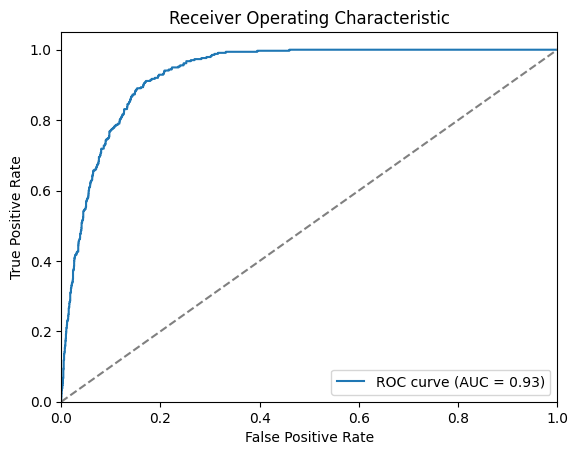

auc_pr: 0.5910407025502898


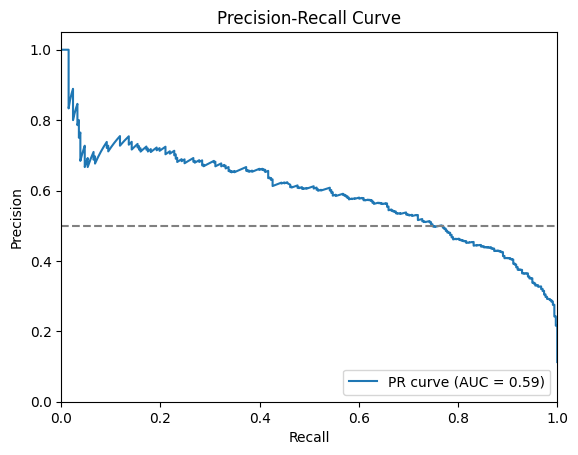

SVM classifier RandomOverSampler:
Confusion Matrix:
 [[2344  318]
 [  72  266]]
F1 Score: 0.5770065075921909
Accuracy: 0.87
Precision: 0.4554794520547945
Recall: 0.7869822485207101

auc_roc: 0.928272776174874


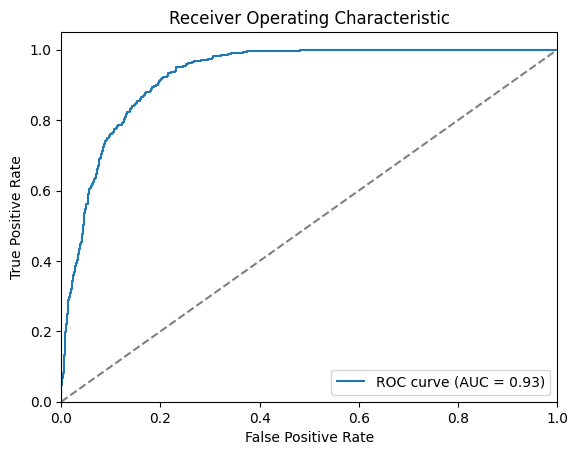

auc_pr: 0.5924150257613126


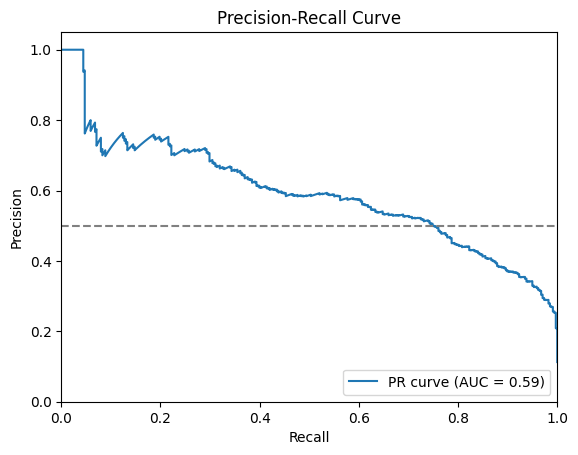

SVM classifier SMOTE:
Confusion Matrix:
 [[2463  199]
 [ 114  224]]
F1 Score: 0.5886990801576872
Accuracy: 0.8956666666666667
Precision: 0.5295508274231678
Recall: 0.6627218934911243

auc_roc: 0.93219495063106


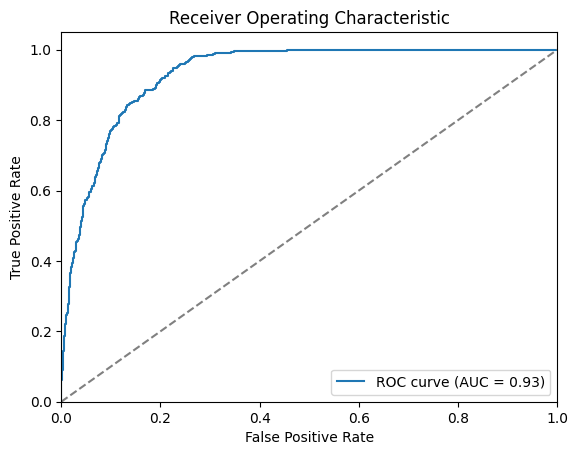

auc_pr: 0.6222718729324224


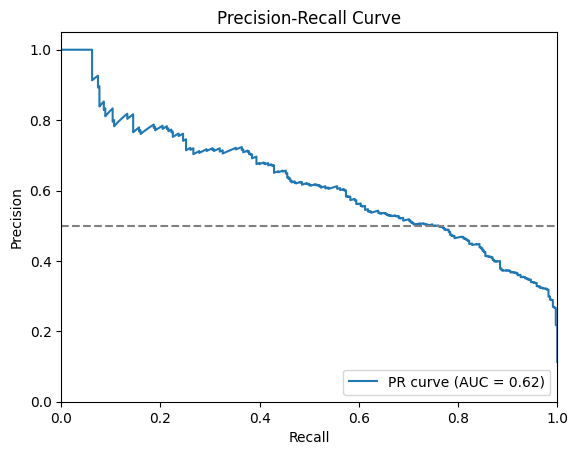

In [1213]:
new_df = df.copy()
new_df = new_df.sample(n=15000, random_state=42)
new_df["y"] = new_df["y"] == "yes"
new_df["contact"] = new_df["contact"] == "cellular"
new_df = new_df.drop([item for item in categorical_columns  if item not in ["contact","y"]], axis =1)
new_df = new_df.drop(["campaign1","campaign2"], axis = 1)



pipeline=make_pipeline(scalar, SVC(probability=True, kernel='rbf', max_iter = -1, class_weight = 'balanced', tol = .001, random_state=42))


param_grid = {
  'svc__C': [1, 10, 100],
  'svc__gamma': [0.001, 0.01],
}

scorer = make_scorer(f1_score)
print("SVM Classifier:")
params = grid_search_pipeline(new_df, pipeline, param_grid, scorer)

mdl = SVC(class_weight = 'balanced', probability=True, kernel='rbf', max_iter = -1, tol = .001, random_state=42, C = params["svc__C"], gamma = params['svc__gamma'])


print("SVM classifier RandomOverSampler:")
pipeline=make_pipeline(RandomOverSampler(random_state=42), scalar, mdl)
test_model(new_df, pipeline)

print("SVM classifier SMOTE:")
pipeline=make_pipeline(SMOTE(random_state=42), scalar, mdl)
test_model(new_df, pipeline)

Random Forest Classifier:
Best parameters: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__n_estimators': 200}
Confusion Matrix:
 [[6679  586]
 [ 229  742]]
F1 Score: 0.6454980426272292
Accuracy: 0.9010441962117532
Precision: 0.5587349397590361
Recall: 0.7641606591143152

auc_roc: 0.942517664720104


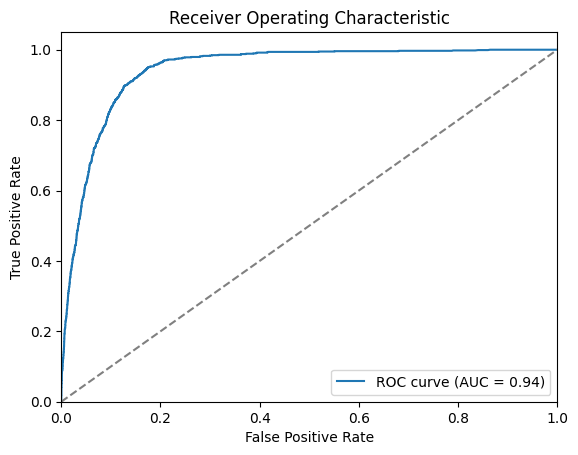

auc_pr: 0.6607031774665457


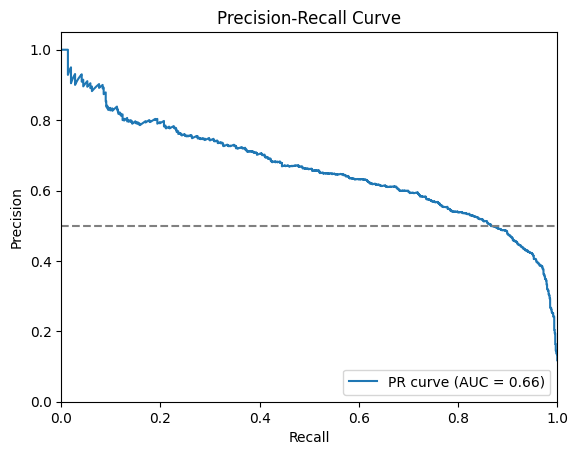

Random Forest Classifier RandomOverSampler:
Confusion Matrix:
 [[6747  518]
 [ 266  705]]
F1 Score: 0.6426618049225159
Accuracy: 0.9048081593006314
Precision: 0.5764513491414555
Recall: 0.7260556127703398

auc_roc: 0.9419302228494192


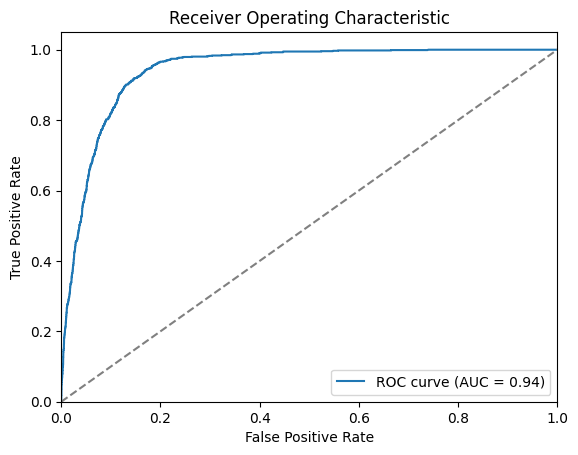

auc_pr: 0.6501241645081174


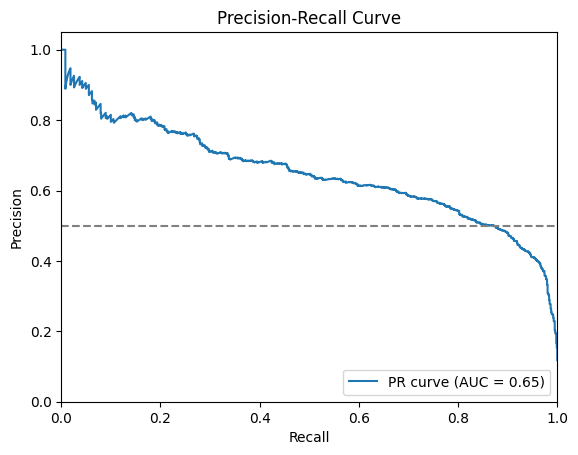

Random Forest Classifier SMOTE:
Confusion Matrix:
 [[6866  399]
 [ 377  594]]
F1 Score: 0.604887983706721
Accuracy: 0.9057795046138902
Precision: 0.5981873111782477
Recall: 0.611740473738414

auc_roc: 0.9414222358939175


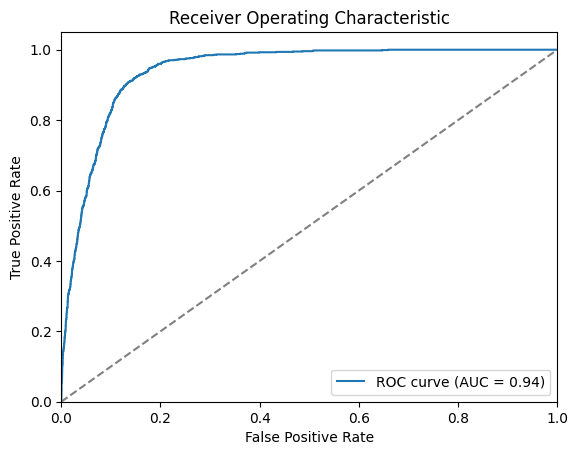

auc_pr: 0.6497581308885145


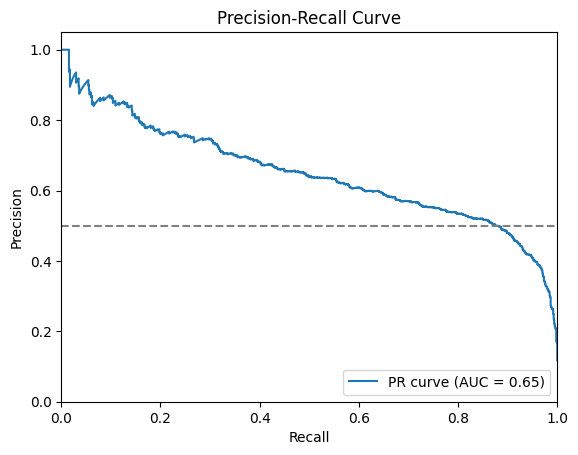

In [1214]:
new_df = df.copy()
new_df["y"] = new_df["y"] == "yes"
new_df["contact"] = new_df["contact"] == "cellular"
new_df = new_df.drop([item for item in categorical_columns  if item not in ["contact","y"]], axis =1)
new_df = new_df.drop(["campaign1","campaign2"], axis = 1)
    


pipeline=make_pipeline(scalar, RandomForestClassifier(n_jobs=1, random_state=42, class_weight = 'balanced'))


param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 20, 40],
    'randomforestclassifier__min_samples_split': [2, 10],
    'randomforestclassifier__min_samples_leaf': [1, 4, 8]
}


scorer = make_scorer(f1_score)
print("Random Forest Classifier:")
params = grid_search_pipeline(new_df, pipeline, param_grid, scorer)

mdl = RandomForestClassifier(n_jobs=1, random_state=42,max_depth = params['randomforestclassifier__max_depth'], 
                             min_samples_leaf = params['randomforestclassifier__min_samples_leaf'],
                             min_samples_split =  params['randomforestclassifier__min_samples_split'],
                             n_estimators= params['randomforestclassifier__n_estimators'], class_weight = 'balanced'
                             )


print("Random Forest Classifier RandomOverSampler:")
pipeline=make_pipeline(RandomOverSampler(random_state=42), scalar, mdl)
test_model(new_df, pipeline)

print("Random Forest Classifier SMOTE:")
pipeline=make_pipeline(SMOTE(random_state=42), scalar, mdl)
test_model(new_df, pipeline)